# Empty-space based filtering

In [1]:
import numpy as np
from numpy import pi as pi
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
from benchmark_demo.utilstf import *
from methods.method_empty_space import empty_space_denoising
from benchmark_demo.SignalBank import SignalBank

Unable to determine R home: [WinError 2] The system cannot find the file specified
Unable to determine R library path: Command '('C:\\Program Files\\R\\R-4.1.2\\bin\\Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 1.


In [2]:
np.random.seed(0) 

# signal parameters
SNRin = 30
N = 2**9

sbank = SignalBank(N=N, Nsub= N//2)
s = sbank.signal_linear_chirp()
# s = sbank.signal_cos_chirp()
# s = sbank.signal_mc_multi_cos()
# s = sbank.signal_mc_multi_linear()
# s = sbank.signal_mc_synthetic_mixture()
# s = sbank.signal_mc_synthetic_mixture_2()
# s = sbank.signal_mc_impulses()
signal = add_snr(s,SNRin)

In [3]:
Nfft = 2*N
g,_ = get_round_window(Nfft)
S, stft, stft_padded, Npad = get_spectrogram(signal, window = g)
radius = 1.0
output = empty_space_denoising(signal,
                                radi_seg=radius,
                                radi_expand=radius,
                                adapt_thr=True,
                                return_dic=True)
s_r, mask = (output[key] for key in ('s_r','mask')) 
print(10*np.log10((np.sum(s**2))/(np.sum((s-s_r)**2))))

1
1.3200000000000007
31.91115688444819


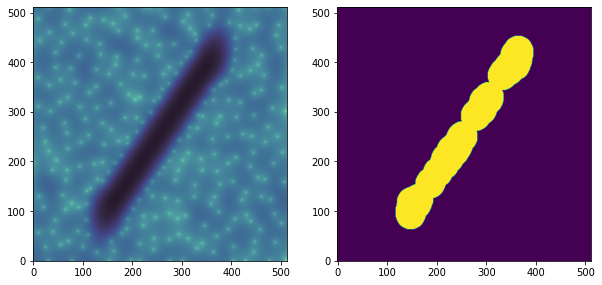

In [4]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
ax[0].imshow(np.log10(S), origin='lower', cmap=cmocean.cm.deep)
ax[1].imshow(mask, origin='lower')
plt.show()